In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

In [ ]:
df = pd.read_csv('EVdata2.csv')

In [ ]:
df

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82
5,6,Himachal Pradesh,0,0,0,0,0,98,0,98
6,7,Jammu & Kashmir,2,76,152,0,0,208,0,438
7,8,Goa,0,0,0,0,0,513,1,514
8,9,Dadra and Nagar Haveli,4,0,9,0,0,803,0,816
9,10,Jharkhand,75,228,736,9,7,655,0,1710


In [ ]:
df.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Sl. No                                                              30 non-null     int64 
 1   State                                                               30 non-null     object
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  30 non-null     int64 
 3   Two Wheelers (Category L2 (CMVR))                                   30 non-null     int64 
 4   Two Wheelers (Max power not exceeding 250 Watts)                    30 non-null     int64 
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 30 non-null     int64 
 6   Three Wheelers (Category L5 as per CMVR)                            30 non-null     int64 
 7   Passenger Cars (Category M1 

In [ ]:
df.isnull().sum()

,0
Sl. No,0
State,0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,0
Two Wheelers (Category L2 (CMVR)),0
Two Wheelers (Max power not exceeding 250 Watts),0
Three Wheelers (Category L5 slow speed as per CMVR),0
Three Wheelers (Category L5 as per CMVR),0
Passenger Cars (Category M1 as per CMVR),0
Buses,0
Total in state,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns=["Sl. No"],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
original_labels = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    original_labels[column] = label_encoder.classes_

In [ ]:
df.head()

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,19,0,0,0,0,0,6,0,6
1,20,0,20,3,0,0,1,0,24
2,18,16,8,11,0,5,12,0,52
3,26,28,9,36,0,0,8,0,81
4,0,0,0,0,0,0,82,0,82


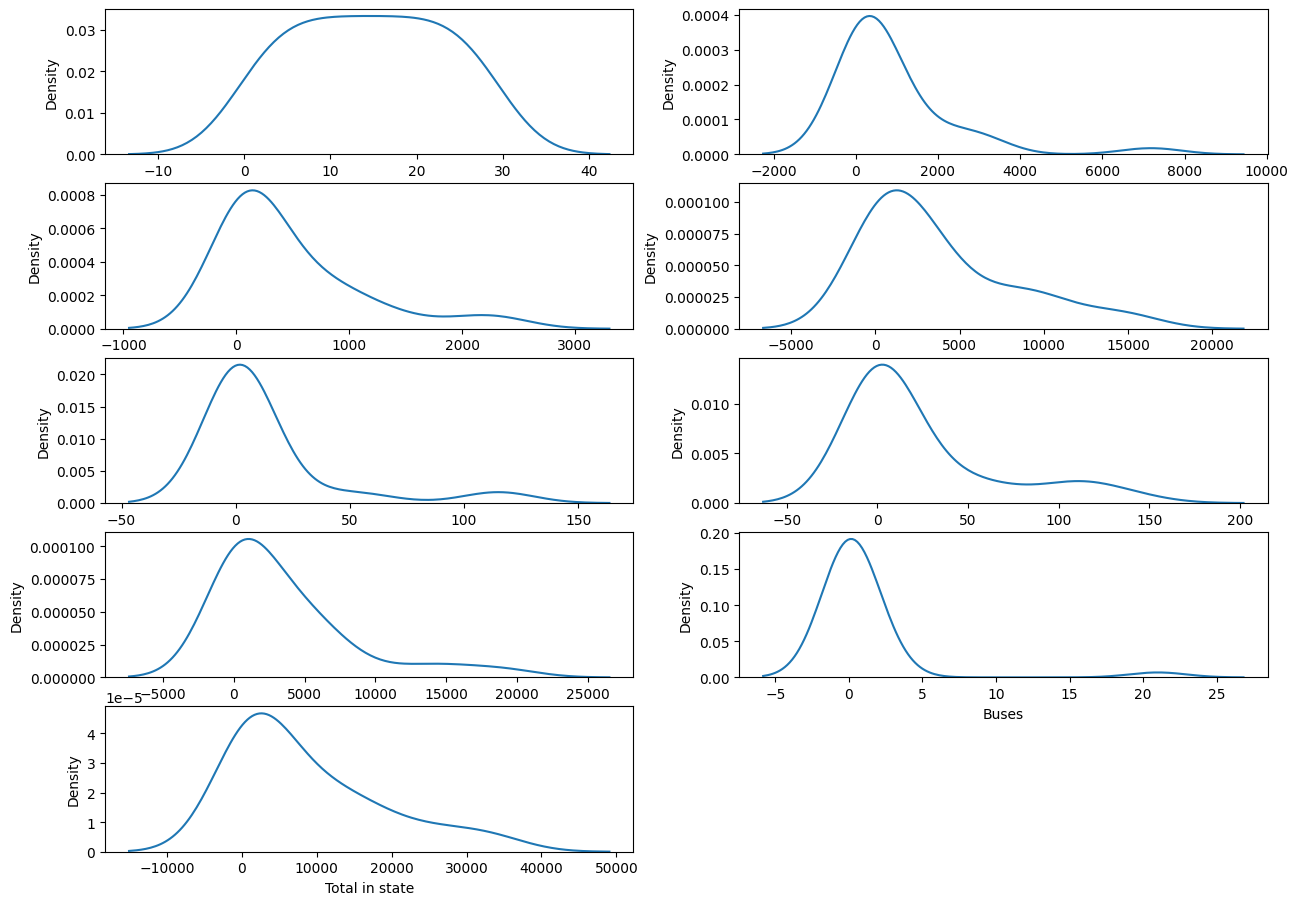

In [ ]:
plt.figure(figsize=(15,20))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

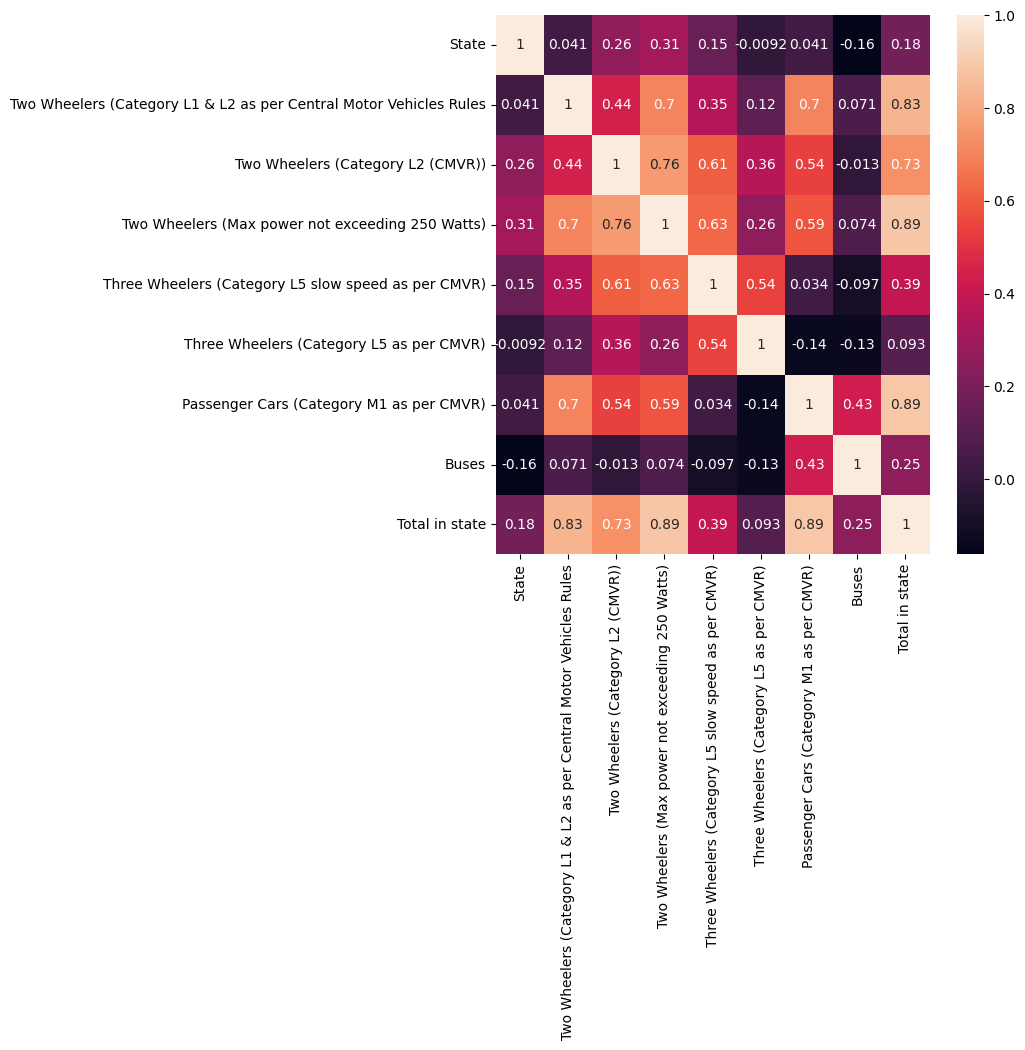

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
scaled_df = scalar.fit_transform(df)

In [ ]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3"])
pca_df

,PCA1,PCA2,PCA3
0,-1.799697,-0.069203,-0.732822
1,-1.772068,-0.097224,-0.825277
2,-1.783213,-0.109426,-0.587048
3,-1.682749,-0.221564,-1.372560
4,-2.050735,0.355118,1.001623
5,-1.897886,0.116010,-0.002930
6,-1.793017,0.085031,-0.102681
7,-1.865331,0.349816,0.361415
8,-1.875550,0.302924,0.448835
9,-1.392767,-0.145901,-0.080562


from matplotlib import pyplot as plt
pca_df['PCA1'].plot(kind='hist', bins=20, title='PCA1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_df['PCA2'].plot(kind='hist', bins=20, title='PCA2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_df['PCA3'].plot(kind='hist', bins=20, title='PCA3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_df.plot(kind='scatter', x='PCA1', y='PCA2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_df.plot(kind='scatter', x='PCA2', y='PCA3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pca_df['PCA1'].plot(kind='line', figsize=(8, 4), title='PCA1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pca_df['PCA2'].plot(kind='line', figsize=(8, 4), title='PCA2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pca_df['PCA3'].plot(kind='line', figsize=(8, 4), title='PCA3')
plt.gca().spines[['top', 'right']].set_visible(False)

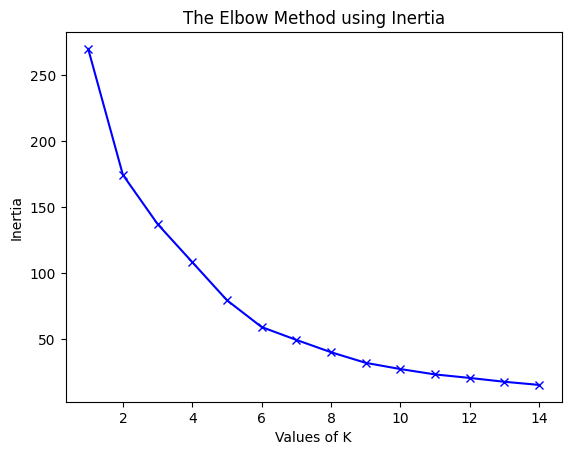

In [ ]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

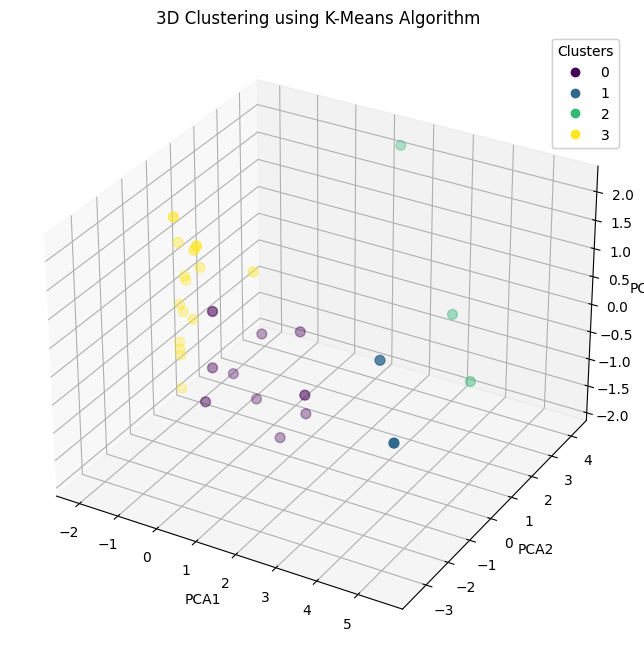

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df_kmeans['PCA1'], pca_df_kmeans['PCA2'], pca_df_kmeans['PCA3'], c=pca_df_kmeans['cluster'], cmap='viridis', s=50)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title("3D Clustering using K-Means Algorithm")
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


In [ ]:
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,21.700000,773.000000,564.4,4802.700000,8.000000,25.000000,3957.700000,0.300000,10131.100000
1,18.500000,3058.000000,1929.5,14553.500000,115.000000,81.500000,5161.500000,0.000000,24899.000000
2,11.000000,3735.666667,855.0,7880.000000,2.000000,2.666667,15737.333333,7.666667,28220.333333
3,9.866667,166.400000,133.4,784.266667,4.866667,19.933333,563.933333,0.066667,1672.866667


In [ ]:
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,Cluster
0,19,0,0,0,0,0,6,0,6,3
1,20,0,20,3,0,0,1,0,24,3
2,18,16,8,11,0,5,12,0,52,3
3,26,28,9,36,0,0,8,0,81,3
4,0,0,0,0,0,0,82,0,82,3
5,11,0,0,0,0,0,98,0,98,3
6,12,2,76,152,0,0,208,0,438,3
7,8,0,0,0,0,0,513,1,514,3
8,6,4,0,9,0,0,803,0,816,3
9,13,75,228,736,9,7,655,0,1710,3


In [ ]:
cluster_0_df = cluster_df[cluster_df["Cluster"]==0]
cluster_0_df

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,Cluster
13,21,377,824,2031,0,37,594,0,3863,0
14,28,423,168,3239,45,38,265,0,4178,0
16,16,503,378,2904,8,106,2562,0,6461,0
17,22,698,300,1968,0,5,3567,0,6538,0
18,25,535,711,2256,2,0,5530,0,9034,0
20,15,432,78,4961,1,0,5729,1,11202,0
21,14,784,1104,3252,2,0,8242,2,13386,0
22,29,1451,65,10781,3,0,1840,0,14140,0
23,23,2036,1153,8375,19,64,4116,0,15763,0
24,24,491,863,8260,0,0,7132,0,16746,0


In [ ]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==1]
cluster_1_df

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,Cluster
26,10,3162,1504,13908,113,24,4878,0,23589,1
27,27,2954,2355,15199,117,139,5445,0,26209,1
